In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from my_plot import set_size
plt.style.use('default')

In [27]:
savefig = input("save figures? ")
if "no" in savefig or "n" in savefig:
    savefig = False
    print(" ### NOT SAVING FIGURES ### ")
else:
    savefig = True
    print(" ### SAVING FIGURES ### ")

save figures? y
 ### SAVING FIGURES ### 


In [28]:
#matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams.update({'font.size': 14})
matplotlib.rc('text', usetex=True)

In [29]:
width = 430.00462

In [30]:
df = pd.read_csv("48_Industry_Portfolios_daily.CSV")
dates = pd.to_datetime(df.iloc[:, 0], format='%Y%m%d', errors='coerce')
df.iloc[:, 0] = dates

C:\Users\Ubaid\miniconda3\envs\msc\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,11,15,20,26,27,33,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [31]:
df=df.rename(columns = {'Unnamed: 0':'Date'})
df = df[df['Date'] > '2000-01-01']

In [32]:
df.replace(' NaN', np.nan, inplace=True)

In [33]:
df.dropna(inplace=True)
df.drop('Date', axis=1, inplace=True)

In [34]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Agric'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -16.224569
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [35]:
from sklearn.cluster import KMeans # Our clustering algorithm
from sklearn.decomposition import PCA # Needed for dimension reduction
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [37]:
pca = PCA(n_components=48)
principalComponents = pca.fit_transform(df_std)

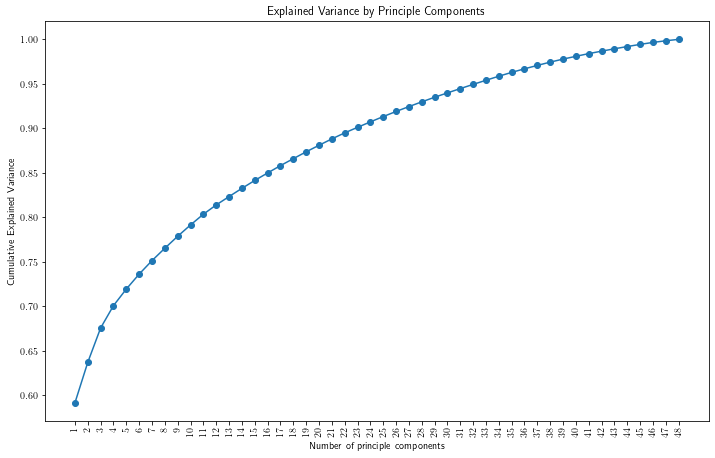

In [38]:
%matplotlib inline
fig, ax = plt.subplots(figsize = set_size(width, fraction=2))
ax.plot(range(1,49), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xticks(range(1,49), rotation = 90 )
plt.title('Explained Variance by Principle Components')
plt.xlabel('Number of principle components')
plt.ylabel('Cumulative Explained Variance')
if savefig: plt.savefig("cumvariance.jpg")
plt.show()

In [39]:
pca.components_.shape

(48, 48)

# PCA with K-means clustering

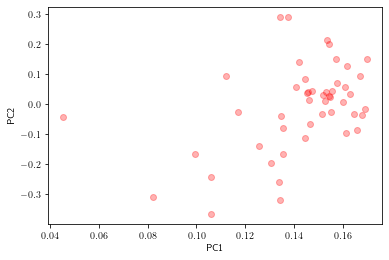

In [40]:
%matplotlib inline
pca = PCA(n_components=48)
principalComponents = pca.fit_transform(df_std)
coefficients = pd.DataFrame(pca.components_)
PCA_components = pd.DataFrame(principalComponents)
plt.scatter(coefficients.iloc[0,:], coefficients.iloc[1,:], alpha=.3, color='red')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

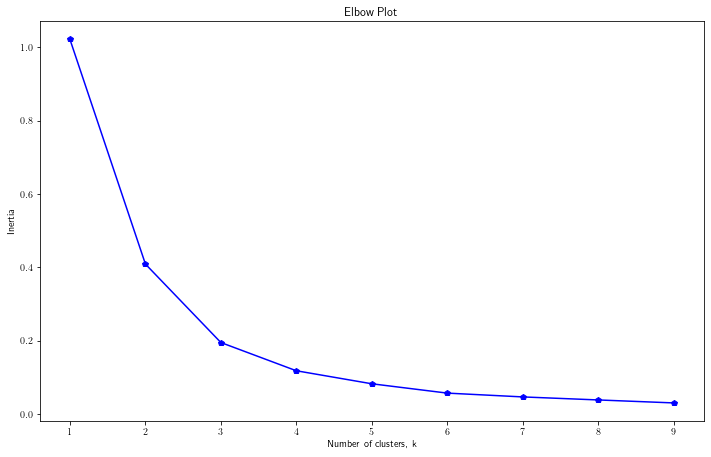

In [41]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(coefficients.iloc[:2, :].transpose())
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

fig, ax = plt.subplots(figsize = set_size(width, fraction=2))
ax.plot(range(1,10), inertias, '-p', color='blue')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
if savefig: plt.savefig("elbow.jpg")
plt.show()

In [54]:
%matplotlib inline
model = KMeans(n_clusters=3)
model.fit(coefficients.iloc[:2,:].transpose())

labels = model.predict(coefficients.iloc[:2,:].transpose())
centers = model.cluster_centers_

In [55]:
plus_x = []
plus_y = []
x_x = []
x_y = []
star_x = []
star_y = []

for i in range(len(coefficients.iloc[0,:])):
    if labels[i] == 0:
        plus_x.append(coefficients.iloc[0, i])
        plus_y.append(coefficients.iloc[1, i])
    elif labels[i] == 1:
        x_x.append(coefficients.iloc[0, i])
        x_y.append(coefficients.iloc[1, i])
    else:
        star_x.append(coefficients.iloc[0, i])
        star_y.append(coefficients.iloc[1, i])
        

In [56]:
%matplotlib qt
fig, ax = plt.subplots(figsize = set_size(2*width))
ax.scatter(plus_x, plus_y, c = 'maroon', marker = 'o', label = '1')
ax.scatter(x_x, x_y, c = 'lime', marker = 'o', label = '2')
ax.scatter(star_x, star_y, c = 'cyan', marker = 'o', label = '3')

# Plotting centers

ax.scatter(centers[0][0], centers[0][1], marker='x', c='maroon')
ax.scatter(centers[1][0], centers[1][1], marker='x', c='lime')
ax.scatter(centers[2][0], centers[2][1], marker='x', c='cyan')

for i, txt in enumerate(np.array(df.columns)):
    plt.annotate(txt, (coefficients.iloc[0,:][i], coefficients.iloc[1,:][i]))
    

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("K-means Clustering")
plt.legend()
plt.show()
if savefig: plt.savefig("K-means.jpg")

In [45]:
np.unique(labels, return_counts=True)

(array([0, 1, 2]), array([ 9, 10, 29], dtype=int64))

## Hierarchical Clustering

In [46]:
from sklearn.cluster import AgglomerativeClustering

In [47]:
clustering = AgglomerativeClustering(n_clusters=3).fit(coefficients.iloc[:2,:].transpose())
clustering.labels_

array([0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0], dtype=int64)

In [48]:
labels = clustering.labels_
plus_x = []
plus_y = []
x_x = []
x_y = []
star_x = []
star_y = []

for i in range(len(coefficients.iloc[0,:])):
    if labels[i] == 0:
        plus_x.append(coefficients.iloc[0, i])
        plus_y.append(coefficients.iloc[1, i])
    elif labels[i] == 1:
        x_x.append(coefficients.iloc[0, i])
        x_y.append(coefficients.iloc[1, i])
    else:
        star_x.append(coefficients.iloc[0, i])
        star_y.append(coefficients.iloc[1, i])
        

In [49]:
%matplotlib qt
fig, ax = plt.subplots(figsize=set_size(2*width))
ax.scatter(plus_x, plus_y, c = 'maroon', marker = 'o', label = '1')
ax.scatter(x_x, x_y, c = 'lime', marker = 'o', label = '2')
ax.scatter(star_x, star_y, c = 'cyan', marker = 'o', label = '3')


ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("Hierarchical Clustering")



for i, txt in enumerate(np.array(df.columns)):
    ax.annotate(txt, (coefficients.iloc[0,:][i], coefficients.iloc[1,:][i]))
    
plt.legend()
if savefig: plt.savefig("hierarchical.jpg")
plt.show()

In [50]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df_std)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()